## KNN for Question 2: 
#### Neutral vs. facial expression classification (for dataset DATA)

In [8]:
import numpy as np

#### Read and load data

In [41]:
from get_train_test_data1 import *

# number of points in train data :
train_size = 100

data_all = GetNeutralvsExpData()
data_all = GetTrainTestSplit(data_all,train_size)

---------- Data
(24, 21, 600)
(600, 24, 21)
Data shape with neutral and Exp data:  (200, 2, 504)
Test Labels: 
1.0 -1.0 1.0 -1.0 1.0 -1.0 1.0


In [42]:
print('Shapes')
print(' Train x\t',data_all[0].shape)
print(' Train y\t',data_all[1].shape)
print(' Test x\t',data_all[2].shape)
print(' Test y\t',data_all[3].shape)

Shapes
 Train x	 (300, 504)
 Train y	 (300,)
 Test x	 (100, 504)
 Test y	 (100,)


In [43]:
a = data_all[0].shape[0]//2
print(a)
train_knn = data_all[0].reshape(a,2,data_all[0].shape[1])


150


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.io import loadmat
import numpy as np
from sklearn.metrics import accuracy_score
from knn import *




In [45]:
k_choices = [1,2,3, 5,13, 15]

In [46]:
train_x_face = train_knn
train_y_face = data_all[1]
test_x_face = data_all[2]
test_y_face = data_all[3]

train_y_face = [2 if x== -1 else x for x in train_y_face]
test_y_face = [2 if x== -1 else x for x in test_y_face]

acc_data = []
for k in k_choices:
    knn = KNN(k,train_x_face,train_y_face,test_x_face)
    predicted_data = knn.classify()
    acc = accuracy_score(predicted_data,test_y_face)
    acc_data.append(acc)
    print('For K= ',k,' accuraccy is ',acc)
    


For K=  1  accuraccy is  0.53
For K=  2  accuraccy is  0.54
For K=  3  accuraccy is  0.48
For K=  5  accuraccy is  0.45
For K=  13  accuraccy is  0.5
For K=  15  accuraccy is  0.46


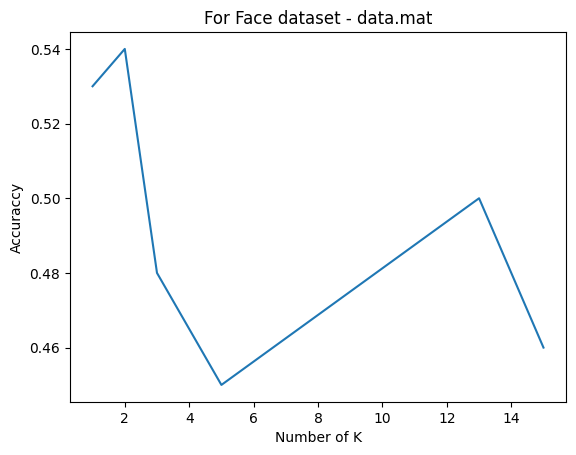

In [48]:
plt.figure()
plt.title('KNN original dataset neutral vs facial exp')
plt.xlabel('Number of K')
plt.ylabel('Accuraccy')
plt.plot(k_choices,acc_data)
plt.savefig("accKNN2_orig.png")

## With PCA

In [16]:
from pca import *

In [30]:
# Try with different number of components
num_comp = [10,30,50,70,85,100,200,250]
train_x = train_knn
train_y = data_all[1]
test_x = data_all[2]
test_y = data_all[3]

train_y = [2 if x== -1 else x for x in train_y]
test_y = [2 if x== -1 else x for x in test_y]
# Resize to 2D:
train_x = train_x.reshape(train_x.shape[0]*train_x.shape[1],train_x.shape[2])
acc_percomp = []

for num in num_comp:
    acc_data = []
    pca = PCA(num)
    pca.fit(train_x)
    train_x_dash = pca.transform(train_x)
    # pca = PCA(num)
    # pca.fit(test_x)
    test_x_dash = pca.transform(test_x)
    # print(train_x_dash.shape)
    # print(test_x_dash.shape)
    train_x_dash = train_x_dash.reshape(train_x_dash.shape[0]//2,2,num)
    for k in k_choices:
        knn = KNN(k,train_x_dash,train_y,test_x_dash)
        predicted_data = knn.classify()
        acc = accuracy_score(predicted_data,test_y)
        acc_data.append(acc)
        print('For num_comp = ',num,' & K= ',k,' accuraccy is ',acc)
    pass
    acc_percomp.append(acc_data)


For num_comp =  10  & K=  1  accuraccy is  0.5
For num_comp =  10  & K=  2  accuraccy is  0.6
For num_comp =  10  & K=  3  accuraccy is  0.5
For num_comp =  10  & K=  5  accuraccy is  0.4
For num_comp =  10  & K=  13  accuraccy is  0.4
For num_comp =  10  & K=  15  accuraccy is  0.5
For num_comp =  30  & K=  1  accuraccy is  0.4
For num_comp =  30  & K=  2  accuraccy is  0.5
For num_comp =  30  & K=  3  accuraccy is  0.5
For num_comp =  30  & K=  5  accuraccy is  0.5
For num_comp =  30  & K=  13  accuraccy is  0.6
For num_comp =  30  & K=  15  accuraccy is  0.7
For num_comp =  50  & K=  1  accuraccy is  0.5
For num_comp =  50  & K=  2  accuraccy is  0.5
For num_comp =  50  & K=  3  accuraccy is  0.4
For num_comp =  50  & K=  5  accuraccy is  0.5
For num_comp =  50  & K=  13  accuraccy is  0.7
For num_comp =  50  & K=  15  accuraccy is  0.6
For num_comp =  70  & K=  1  accuraccy is  0.5
For num_comp =  70  & K=  2  accuraccy is  0.5
For num_comp =  70  & K=  3  accuraccy is  0.4
For num

In [49]:
bestacc = []
for x in acc_percomp:
    #print(x)
    bestacc.append(x[np.argmax(x)])
bestacc

[0.6, 0.7, 0.7, 0.7, 0.6, 0.7, 0.6, 0.7]

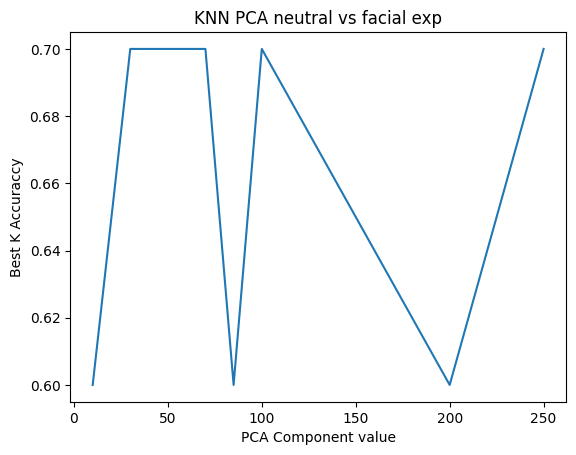

In [50]:
x_ = [10,30,50,70,85,100,200,250]
y_ = bestacc

plt.figure()
plt.title('KNN PCA neutral vs facial exp')
plt.xlabel('PCA Component value')
plt.ylabel('Best K Accuraccy')
plt.plot(x_,y_)
plt.savefig("acc_KNN2PCA.png")

In [32]:
acc_percomp[0]

[0.5, 0.6, 0.5, 0.4, 0.4, 0.5]

## With MDA

In [33]:
from mda import *

In [39]:
train_x = train_knn
train_y = data_all[1]
test_x = data_all[2]
test_y = data_all[3]

train_y = [2 if x== -1 else x for x in train_y]
test_y = [2 if x== -1 else x for x in test_y]

num_newdim = [5,10,20,120,200,250]
acc_percomp_mda = []
for n_dim in num_newdim:
    mda_data = MDA(0.5,train_x,test_x,n_dim)
    mda_data.get_matA()
    train_x_dash = mda_data.transform(train_x)
    test_x_dash = mda_data.transform(test_x)
    acc_data_mda = []
    for k in k_choices:
        knn = KNN(k,train_x_dash,train_y,test_x_dash)
        predicted_data = knn.classify()
        acc = accuracy_score(predicted_data,test_y)
        acc_data_mda.append(acc)
        print('For num_comp = ',n_dim,' & K= ',k,' accuraccy is ',acc)
    acc_percomp_mda.append(acc_data_mda)

For num_comp =  5  & K=  1  accuraccy is  0.3333333333333333
For num_comp =  5  & K=  2  accuraccy is  0.5
For num_comp =  5  & K=  3  accuraccy is  0.5
For num_comp =  5  & K=  5  accuraccy is  0.6666666666666666
For num_comp =  5  & K=  13  accuraccy is  0.6666666666666666
For num_comp =  5  & K=  15  accuraccy is  0.6666666666666666
For num_comp =  10  & K=  1  accuraccy is  0.8333333333333334
For num_comp =  10  & K=  2  accuraccy is  0.6666666666666666
For num_comp =  10  & K=  3  accuraccy is  0.6666666666666666
For num_comp =  10  & K=  5  accuraccy is  0.5
For num_comp =  10  & K=  13  accuraccy is  0.8333333333333334
For num_comp =  10  & K=  15  accuraccy is  0.5
For num_comp =  20  & K=  1  accuraccy is  0.6666666666666666
For num_comp =  20  & K=  2  accuraccy is  0.6666666666666666
For num_comp =  20  & K=  3  accuraccy is  0.6666666666666666
For num_comp =  20  & K=  5  accuraccy is  0.5
For num_comp =  20  & K=  13  accuraccy is  0.8333333333333334
For num_comp =  20  & 

In [51]:
bestacc = []
for x in acc_percomp_mda:
    #print(x)
    bestacc.append(x[np.argmax(x)])
bestacc

[0.6666666666666666,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334]

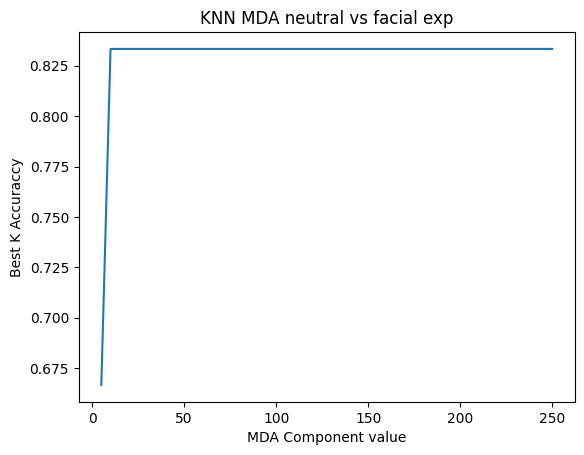

In [53]:
x_ = [5,10,20,120,200,250]
y_ = bestacc

plt.figure()
plt.title('KNN MDA neutral vs facial exp')
plt.xlabel('MDA Component value')
plt.ylabel('Best K Accuraccy')
plt.plot(x_,y_)
plt.savefig("acc_KNN2MDA.png")